Homework 5: Neural Language Models  (& 🎃 SpOoKy 👻 authors 🧟 data) - Task 2
---

Task 2: Training your own word embeddings (14 points)
--------------------------------
Harishraj Udaya Bhaskar(6120 Student) 
For this task, you'll use the `gensim` package to train your own embeddings for both words and characters. These will eventually act as inputs to your neural language model.

In [3]:
# import your libraries here


# Remember to restart your kernel if you change the contents of this file!
import neurallm_utils as nutils

# for word embeddings
from gensim.models import Word2Vec

# your other imports here

[nltk_data] Downloading package punkt to /Users/harisha/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [4]:
# If running on colab, you'll need to mount your drive to access data files

# from google.colab import drive
# drive.mount('/content/drive')

In [5]:
# constants you may find helpful. Edit as you would like.

NGRAM = 3 # The ngram language model you want to train
EMBEDDING_SAVE_FILE_WORD = "spooky_embedding_word.txt" # The file to save your word embeddings to
EMBEDDING_SAVE_FILE_CHAR = "spooky_embedding_char.txt" # The file to save your word embeddings to
TRAIN_FILE = 'spooky_author_train.csv' # The file to train your language model on

# The dimensions of word embedding. 
# This variable will be used throughout the program
# DO NOT WRITE "50" WHEN YOU ARE REFERRING TO THE EMBEDDING SIZE
EMBEDDINGS_SIZE = 50

Train embeddings on provided dataset
---

In [6]:
# your code here
# use the provided utility functions to read in the data

data=nutils.read_file_spooky(TRAIN_FILE,NGRAM)
data_char=nutils.read_file_spooky(TRAIN_FILE,NGRAM,True)
# data = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
# 			['this', 'is', 'the', 'second', 'sentence'],
# 			['yet', 'another', 'sentence'],
# 			['one', 'more', 'sentence'],
# 			['and', 'the', 'final', 'sentence']]


# read the data in both by character and by word

# print out the first two sentences in each format
print('Printing out the first two sentences for word level')
for i in range(len(data)-2,len(data)):
    print(data[i])
print('---------------------------------------------')
print('Printing out the first two sentences for character level')
for i in range(len(data_char)-2,len(data_char)):
    print(data_char[i])

# make sure we can read the output easily, but you are welcome to leave tokens in their lists



Printing out the first two sentences for word level
['<s>', '<s>', 'for', 'an', 'item', 'of', 'news', 'like', 'this', ',', 'it', 'strikes', 'us', 'it', 'was', 'very', 'coolly', 'received', '.', "''", '</s>', '</s>']
['<s>', '<s>', 'he', 'laid', 'a', 'gnarled', 'claw', 'on', 'my', 'shoulder', ',', 'and', 'it', 'seemed', 'to', 'me', 'that', 'its', 'shaking', 'was', 'not', 'altogether', 'that', 'of', 'mirth', '.', '</s>', '</s>']
---------------------------------------------
Printing out the first two sentences for character level
['<s>', '<s>', 'f', 'o', 'r', '_', 'a', 'n', '_', 'i', 't', 'e', 'm', '_', 'o', 'f', '_', 'n', 'e', 'w', 's', '_', 'l', 'i', 'k', 'e', '_', 't', 'h', 'i', 's', ',', '_', 'i', 't', '_', 's', 't', 'r', 'i', 'k', 'e', 's', '_', 'u', 's', '_', 'i', 't', '_', 'w', 'a', 's', '_', 'v', 'e', 'r', 'y', '_', 'c', 'o', 'o', 'l', 'l', 'y', '_', 'r', 'e', 'c', 'e', 'i', 'v', 'e', 'd', '.', '"', '</s>', '</s>']
['<s>', '<s>', 'h', 'e', '_', 'l', 'a', 'i', 'd', '_', 'a', '_', 

In [7]:
# 10 points
# create your word embeddings
# use the skip gram algorithm and a window size of 5
# min_count should be 1
# takes ~3 sec on Felix's computer for character embeddings using skip-gram with window size 5
# takes ~3 sec on Felix's computer for word embeddings using skip-gram with window size 5 


model = Word2Vec(sentences=data, vector_size=EMBEDDINGS_SIZE, window=5,sg=1, min_count=1, workers=4)
model_char=Word2Vec(sentences=data_char, vector_size=EMBEDDINGS_SIZE, window=5,sg=1, min_count=1, workers=4)


    

In [20]:
model.wv['the']

array([ 0.25321075, -0.1430397 , -0.10285791,  0.3697534 , -0.10783006,
       -0.27763444,  0.45125186,  0.35519657, -0.0753504 , -0.33049193,
       -0.16198292,  0.06502963,  0.4504056 , -0.17030701, -0.1118046 ,
        0.276775  ,  0.6659913 ,  0.09225599, -0.4808476 , -0.17962115,
       -0.20539722,  0.24055251,  0.51983166, -0.54444456,  0.0267171 ,
        0.1684525 ,  0.10571485,  0.35191214, -0.1911613 , -0.40454155,
       -0.43705383, -0.6833298 , -0.3791172 , -0.35158855, -0.1514201 ,
        0.63104653,  0.3669881 ,  0.02430174,  0.24787933,  0.03752017,
        0.6069863 , -0.04061401, -0.08996674, -0.55174387,  0.70890427,
        0.34219792,  0.16973945, -0.05851787, -0.38674155,  0.3007738 ],
      dtype=float32)

In [13]:
# 4 points
# print out the vocabulary size for your embeddings for both your word
# embeddings and your character embeddings
# label which is which when you print them out

vocab = len(model.wv.key_to_index)
print("Vocabulary Size for word embeddings:", vocab)


vocab_char = len(model_char.wv.key_to_index)
print("Vocabulary Size for character embeddings:", vocab_char)


# Vocabulary size for character embeddings is 60
# Vocabulary size for word embeddings is 25374



Vocabulary Size for word embeddings: 25385
Vocabulary Size for character embeddings: 60


In [ ]:
# Save both sets of embeddings in txt format
# use the save_word2vec_format method to accomplish this, with the flag binary=False
# you will load your embeddings from files later in the assignment
# and can do so whenever you want to not re-train your embeddings
# look at these files to make sure that you understand their format

model.wv.save_word2vec_format(EMBEDDING_SAVE_FILE_WORD,binary=False)
model_char.wv.save_word2vec_format(EMBEDDING_SAVE_FILE_CHAR,binary=False)

# Saving file in txt format. This will be used later in Sections 4 and 5
# make it so that you don't have to re-train the embeddings each time


In [ ]:
words = list(model.wv.index_to_key)
words

['<s>',
 '</s>',
 ',',
 'the',
 'of',
 '.',
 'and',
 'to',
 'i',
 'a',
 'in',
 'was',
 'that',
 'my',
 ';',
 'it',
 'he',
 'had',
 'with',
 'his',
 'as',
 'for',
 'not',
 'which',
 'but',
 'at',
 'me',
 'from',
 'by',
 '``',
 'is',
 'this',
 'on',
 'be',
 'her',
 "''",
 'were',
 'have',
 'all',
 'you',
 'an',
 'we',
 'or',
 'no',
 'one',
 'so',
 'him',
 'when',
 'they',
 'been',
 'upon',
 "'s",
 'there',
 'could',
 'she',
 'its',
 'would',
 'more',
 'now',
 'their',
 '?',
 'what',
 'some',
 'our',
 "'",
 'are',
 'into',
 'than',
 'will',
 'very',
 'who',
 'if',
 'them',
 'only',
 'then',
 'up',
 'these',
 'before',
 'man',
 'about',
 'any',
 'time',
 'did',
 'yet',
 'out',
 'said',
 'even',
 'your',
 'might',
 'after',
 'old',
 'do',
 'like',
 'can',
 'first',
 'must',
 'us',
 'most',
 'through',
 'over',
 'never',
 'life',
 'night',
 'other',
 'made',
 ':',
 'found',
 'such',
 'should',
 'seemed',
 'eyes',
 'every',
 'little',
 'day',
 'while',
 'still',
 'those',
 'myself',
 'great',


CS 6120 REQUIRED: Visualize your word embeddings
----

Visualizing word embeddings is notoriously difficult because they are high-dimensional. Two typical ways of visualizing them involve projecting them into two dimensions, then graphing their projected locations. Two algorithms that do this sort of projection are t-SNE and PCA. You can also use a clustering algorithm to accomplish this visualization. Examples of this are in your text in section 6.9.


Using one of these algorithms--either projection or clustering--(you may use a library's implementation), make visualizations of both your word embeddings and your character embeddings.

It is up to you to make sure that your visualizations are __both__ legible and meaningful. Legible indicates that when someone looks at them, they are easy to interpret. Meaningful indicates that these visualizations communication something (interesting) about your embeddings.

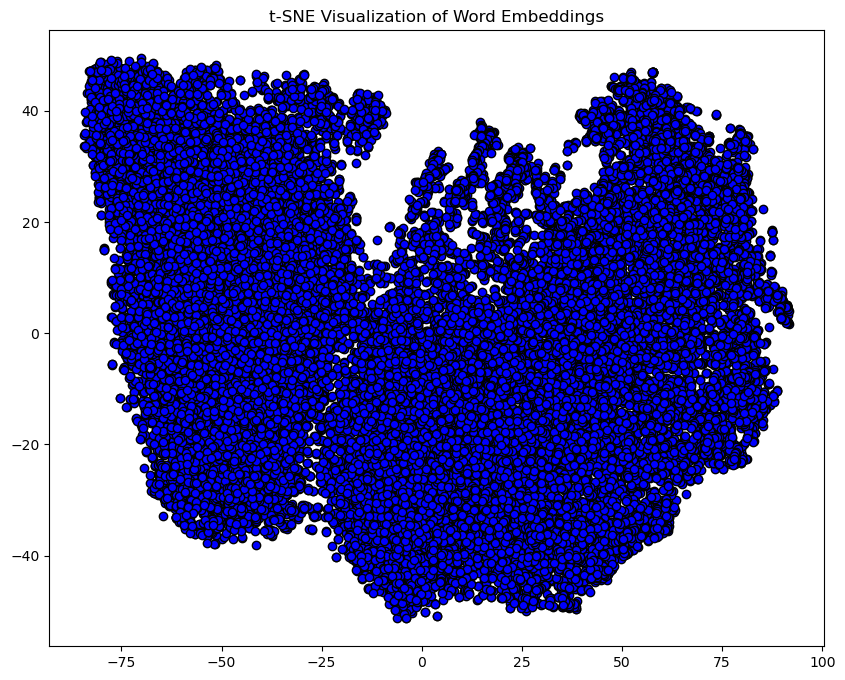

In [22]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Extract word vectors and corresponding words
word_vectors = model.wv.vectors
words = list(model.wv.index_to_key)

# Use t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
word_vectors_2d = tsne.fit_transform(word_vectors)

# Create a scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(word_vectors_2d[:, 0], word_vectors_2d[:, 1], c='blue', edgecolors='k')


plt.title('t-SNE Visualization of Word Embeddings')
plt.show()


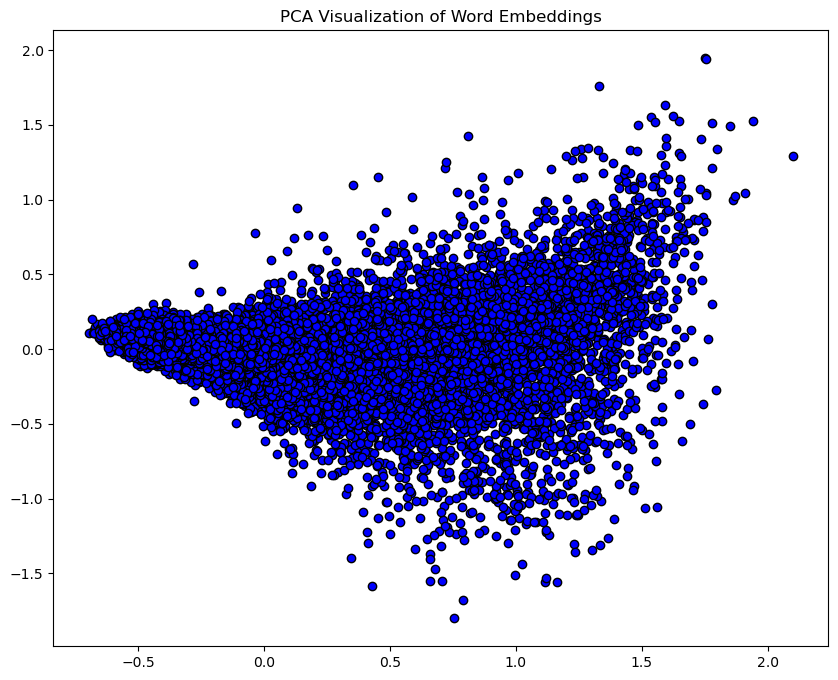

In [ ]:
from sklearn.decomposition import PCA
# Extract word vectors and corresponding words
word_vectors = model.wv.vectors
words = list(model.wv.index_to_key)

word_vectors = model.wv.vectors

# Use PCA for dimensionality reduction
pca = PCA(n_components=2)
word_vectors_2d = pca.fit_transform(word_vectors)

# Create a scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(word_vectors_2d[:, 0], word_vectors_2d[:, 1], c='blue', edgecolors='k')

plt.title('PCA Visualization of Word Embeddings')
plt.show()

1. What is the meaning that you hope to communicate with your visualization of your word embeddings?

2. What is the meaning that you hope to communicate with your visualization of your character embeddings?